<div style="text-align: center"> <h1> Assignment - 7: Variations of kNN</div>

<div style="text-align: center"> <h3>CS677 A1 Data Science with Python (Fall 2024)

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>

### **Part - 1 Manhattan Distance (p = 1)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("META_weekly_return_detailed.xlsx")

In [3]:
# Looking at the dataframe
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label
0,358.989990,360.000000,351.820007,353.959992,352.897461,14980500,-1.217,2023-12-29,52,2023,29,Friday,0.0430,0.889220,Green
1,359.700012,361.899994,357.809998,358.320007,357.244385,11798800,0.137,2023-12-28,52,2023,28,Thursday,0.0430,0.889220,Green
2,356.070007,359.000000,355.309998,357.829987,356.755859,13207900,0.845,2023-12-27,52,2023,27,Wednesday,0.0430,0.889220,Green
3,354.989990,356.980011,353.450012,354.829987,353.764832,9898600,0.407,2023-12-26,52,2023,26,Tuesday,0.0430,0.889220,Green
4,355.579987,357.200012,351.220001,353.390015,352.329193,11764200,-0.198,2023-12-22,51,2023,22,Friday,1.0866,1.349914,Green


##### **Solution - 1**

In [4]:
# Select features (mean_return, volatility) and labels (Green/Red)
X = df[['mean_return', 'volatility']]
y = df['Label'].apply(lambda x: 1 if x == 'Green' else 0)  # Convert Green to 1, Red to 0

# Split data into year 1 (train) and year 2 (test)
train_data = df[df['Year'] == 2022]
test_data = df[df['Year'] == 2023]

X_train = train_data[['mean_return', 'volatility']]
y_train = train_data['Label'].apply(lambda x: 1 if x == 'Green' else 0)

X_test = test_data[['mean_return', 'volatility']]
y_test = test_data['Label'].apply(lambda x: 1 if x == 'Green' else 0)

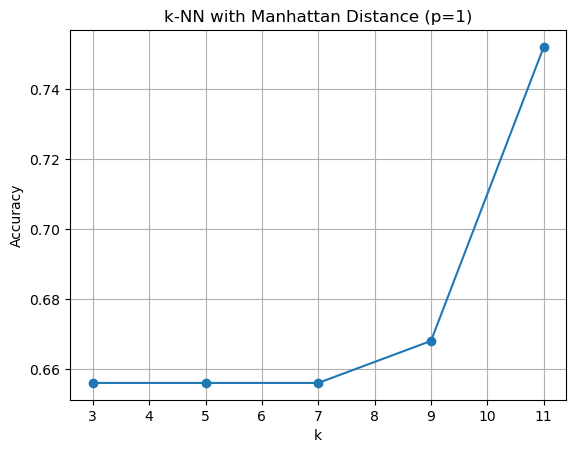

The optimal value of k for year 1 (2022) is: 11


In [5]:
# List of k values to test
k_values = [3, 5, 7, 9, 11]
accuracies = []

# Loop over different values of k
for k in k_values:
    # Initialize k-NN classifier with Manhattan distance (p=1)
    knn = KNeighborsClassifier(n_neighbors=k, p=1)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predict the labels on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies for different k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN with Manhattan Distance (p=1)')
plt.grid(True)
plt.show()

# Print the optimal value of k based on the highest accuracy
optimal_k_manhattan = k_values[np.argmax(accuracies)]
print(f'The optimal value of k for year 1 (2022) is: {optimal_k_manhattan}')


##### **Solution - 2**

In [6]:
# Initialize k-NN classifier with Manhattan distance (p=1) and optimal k
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, p=1)

# Fit the model on the training data (year 1)
optimal_knn.fit(X_train, y_train)

# Predict the labels for year 2
y_pred_year2 = optimal_knn.predict(X_test)

# Calculate accuracy for year 2
accuracy_manhattan = accuracy_score(y_test, y_pred_year2)
print(f'Accuracy for year 2 with k={optimal_k_manhattan} and Manhattan distance: {accuracy_manhattan:.4f}')


Accuracy for year 2 with k=11 and Manhattan distance: 0.7520


##### **Solution - 3**

Confusion matrix for year 2 with k=11:
 [[ 44  42]
 [ 20 144]]


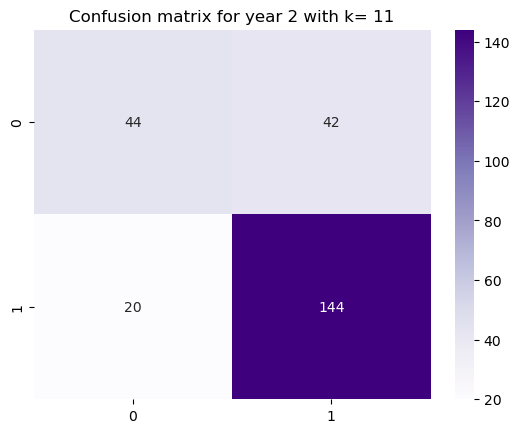

In [7]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_year2)
print(f'Confusion matrix for year 2 with k={optimal_k_manhattan}:\n', conf_matrix)

import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion matrix for year 2 with k= 11')
plt.show()

##### **Solution - 4**

In [8]:
# k-NN with Euclidean distance for comparison
euclidean_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    accuracy_euclidean = accuracy_score(y_train, y_pred_train)
    euclidean_accuracies.append(accuracy)


# Optimal k for Euclidean distance
optimal_k_euclidean = k_values[euclidean_accuracies.index(max(euclidean_accuracies))]
optimal_k_euclidean


3

In [9]:
# Trading strategy based on predictions from euclidean k-NN
initial_balance = 1000.0  # Starting investment amount
final_amount_euclidean = initial_balance

# Assuming `weekly_returns` contains the returns for year 2
weekly_returns = test_data['Adj Close'].pct_change().fillna(0).values  # Example of calculating returns

# Implementing the trading strategy based on predicted labels
for i, label in enumerate(y_pred_year2):
    if label == 1:  # Invest when label is 1
        final_amount_euclidean *= (1 + weekly_returns[i])
    # If the label is 0, no action is taken

# Buy-and-hold strategy calculation
final_amount_buy_and_hold = initial_balance * (test_data['Adj Close'].iloc[-1] / test_data['Adj Close'].iloc[0])

# Print final balances
print(f'Final balance with trading strategy (euclidean): {final_amount_euclidean:.2f}')
print(f'Final balance with buy-and-hold strategy: {final_amount_buy_and_hold:.2f}')


Final balance with trading strategy (euclidean): 239.72
Final balance with buy-and-hold strategy: 352.41


In [10]:
# Print the results
print(f"Optimal k for Manhattan distance: {optimal_k_manhattan}, Accuracy: {max(accuracies):.4f}")
print(f"Optimal k for Euclidean distance: {optimal_k_euclidean}, Accuracy: {max(euclidean_accuracies):.4f}")


Optimal k for Manhattan distance: 11, Accuracy: 0.7520
Optimal k for Euclidean distance: 3, Accuracy: 0.7520


Yes, the manhattan distance value of K is different from Euclidean.

##### **Solution - 5**

In [11]:
# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate True Positive Rate (Sensitivity)
TPR = TP / (TP + FN)

# Calculate True Negative Rate (Specificity)
TNR = TN / (TN + FP)

print(f'True Positive Rate (Sensitivity): {TPR:.4f}')
print(f'True Negative Rate (Specificity): {TNR:.4f}')

True Positive Rate (Sensitivity): 0.8780
True Negative Rate (Specificity): 0.5116


##### **Solution - 6**

In [12]:
# Convert returns from percentages to fractions
weekly_returns = test_data['mean_return'].values / 100
# Initialize starting balance for both strategies
initial_balance = 100.0
final_amount_manhattan = initial_balance
balance_buy_hold = initial_balance

# Check weekly return scaling
weekly_returns = test_data['mean_return'].values
if max(weekly_returns) > 1:
    weekly_returns = weekly_returns / 100  # Convert percentages to decimals

# Trading strategy based on predicted labels
for i, label in enumerate(y_pred_year2):
    if label == 1:  # Green label, invest
        final_amount_manhattan *= (1 + weekly_returns[i])

# Compare with buy-and-hold strategy
investment = 1000  # Starting investment
final_amount_buy_and_hold = investment * (test_data['Adj Close'].iloc[-1] / test_data['Adj Close'].iloc[0])

# Display final balances
print(f'Final balance with trading strategy: {final_amount_manhattan:.2f}')
print(f'Final balance with buy-and-hold strategy: {final_amount_buy_and_hold:.2f}')


Final balance with trading strategy: 487.51
Final balance with buy-and-hold strategy: 352.41


##### **Solution - 7**

In [13]:
# Compare performance
if accuracy_manhattan > accuracy_euclidean:
    print(f'Manhattan distance (p=1) is better with accuracy: {accuracy_manhattan:.4f}')
else:
    print(f'Euclidean distance (p=2) is better with accuracy: {accuracy_euclidean:.4f}')

# Compare trading strategy results
if final_amount_manhattan > final_amount_buy_and_hold:
    print(f"Trading strategy based on k-NN labels outperforms buy-and-hold.")
else:
    print(f"Buy-and-hold strategy outperforms k-NN trading strategy.")


Euclidean distance (p=2) is better with accuracy: 0.7610
Trading strategy based on k-NN labels outperforms buy-and-hold.


### **Part - 2 Minkowski Distance (p = 1.5)**

##### **Solution - 1**

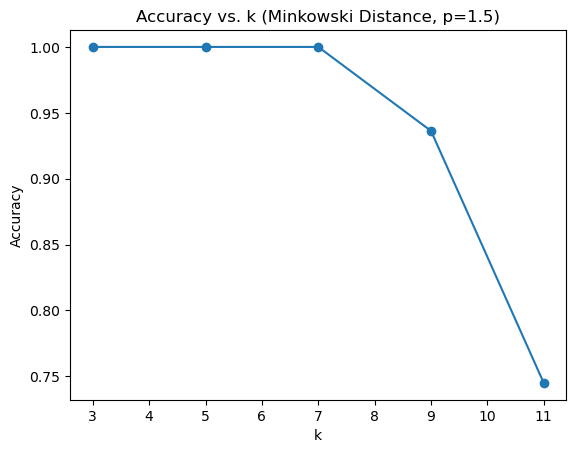

Optimal value of k for year 1: 3


In [14]:
# 1. Compute accuracy for k = 3, 5, 7, 9, 11 with Minkowski distance (p=1.5)
k_values = [3, 5, 7, 9, 11]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=1.5)  # Minkowski distance with p=1.5
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    acc = accuracy_score(y_train, y_pred_train)
    accuracies.append(acc)

# Plotting accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k (Minkowski Distance, p=1.5)')
plt.show()

# Determine the optimal value of k
optimal_k_minkowski = k_values[np.argmax(accuracies)]
print(f'Optimal value of k for year 1: {optimal_k_minkowski}')

##### **Solution - 2**

In [15]:
# 2. Use the optimal value of k to predict labels for year 2
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_minkowski, p=1.5)
knn_optimal.fit(X_train, y_train)
y_pred_year2 = knn_optimal.predict(X_test)

# Calculate accuracy for year 2
accuracy_minkowski = accuracy_score(y_test, y_pred_year2)
print(f'Accuracy for year 2 with optimal k={optimal_k_minkowski}: {accuracy_minkowski:.4f}')

Accuracy for year 2 with optimal k=3: 0.6560


##### **Solution - 3**

Confusion matrix for year 2:
[[ 40  46]
 [ 40 124]]


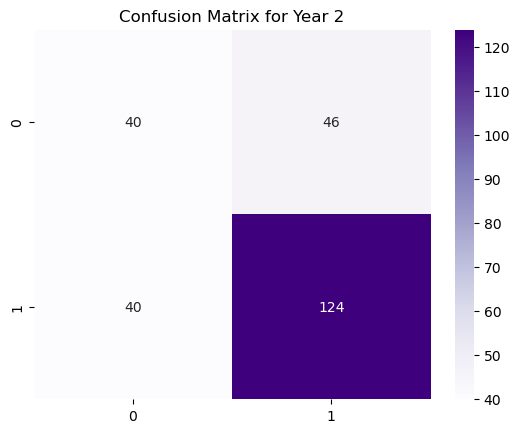

In [16]:
# 3. Compute confusion matrix for year 2
conf_matrix = confusion_matrix(y_test, y_pred_year2)
print(f'Confusion matrix for year 2:\n{conf_matrix}')

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix for Year 2')
plt.show()

##### **Solution - 4**

In [17]:
# Print the results
print(f"Optimal k for Minkowski distance: {optimal_k_minkowski}, Accuracy: {accuracy_minkowski:.4f}")
print(f"Optimal k for Euclidean distance: {optimal_k_euclidean}, Accuracy: {max(euclidean_accuracies):.4f}")


Optimal k for Minkowski distance: 3, Accuracy: 0.6560
Optimal k for Euclidean distance: 3, Accuracy: 0.7520


Both have same K values

##### **Solution - 5**

In [18]:
# 5. Compute true positive rate (recall) and true negative rate (specificity)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity (recall) = TP / (TP + FN)
true_positive_rate = tp / (tp + fn)
# Specificity = TN / (TN + FP)
true_negative_rate = tn / (tn + fp)

print(f'True Positive Rate (Recall): {true_positive_rate:.4f}')
print(f'True Negative Rate (Specificity): {true_negative_rate:.4f}')

True Positive Rate (Recall): 0.7561
True Negative Rate (Specificity): 0.4651


##### **Solution - 6**

In [19]:
# 6. Implement trading strategy based on labels for year 2 and compare with buy-and-hold
initial_balance = 100.0
final_amount_minkowski = initial_balance
balance_buy_hold = initial_balance

# Assuming `weekly_returns` contains the returns for year 2
for i, label in enumerate(y_pred_year2):
    if label == 1:  # Invest when label is 1
        final_amount_minkowski *= (1 + weekly_returns[i])

# Compare with buy-and-hold strategy
investment = 1000  # Starting investment
final_amount_buy_and_hold = investment * (test_data['Adj Close'].iloc[-1] / test_data['Adj Close'].iloc[0])

print(f'Final balance with trading strategy: {final_amount_minkowski:.2f}')
print(f'Final balance with buy-and-hold strategy: {final_amount_buy_and_hold:.2f}')

Final balance with trading strategy: 335.11
Final balance with buy-and-hold strategy: 352.41


##### **Solution - 7**

In [20]:
# Compare performance
if accuracy_minkowski > accuracy_euclidean:
    print(f'Minkowski Distance (p = 1.5) is better with accuracy: {accuracy_minkowski:.4f}')
else:
    print(f'Euclidean distance (p=2) is better with accuracy: {accuracy_euclidean:.4f}')

# Compare trading strategy results
if final_amount_minkowski > final_amount_buy_and_hold:
    print(f"Trading strategy based on k-NN labels outperforms buy-and-hold.")
else:
    print(f"Buy-and-hold strategy outperforms k-NN trading strategy.")


Euclidean distance (p=2) is better with accuracy: 0.7610
Buy-and-hold strategy outperforms k-NN trading strategy.


**💡Conclusion kNN vs Logistic💡-**

The trading strategy based on k-NN labels performs better, where based on Logistic Regression buy-and-hold strategy performs better.

### **Part - 3 Nearest Centroid**

##### **Solution - 1**

In [21]:
import numpy as np

# Calculate centroids
centroids = {
    'Green': train_data[train_data['Label'] == 'Green'][['mean_return', 'volatility']].mean().values,
    'Red': train_data[train_data['Label'] == 'Red'][['mean_return', 'volatility']].mean().values
}

# Function to calculate distances
def compute_distances(data, centroid):
    return np.linalg.norm(data[['mean_return', 'volatility']].values - centroid, axis=1)

# Compute distances for the entire dataset
train_data['Green_distance'] = compute_distances(train_data, centroids['Green'])  # Calculate for all data points
train_data['Red_distance'] = compute_distances(train_data, centroids['Red'])  # Calculate for all data points


# Average and median distances
average_distance = {
    'Green': train_data['Green_distance'].mean(),
    'Red': train_data['Red_distance'].mean()
}

median_distance = {
    'Green': train_data['Green_distance'].median(),
    'Red': train_data['Red_distance'].median()
}

print("Average Distance:", average_distance)
print("Median Distance:", median_distance)

Average Distance: {'Green': 2.005334866508486, 'Red': 2.0164047203447306}
Median Distance: {'Green': 1.6079483337724119, 'Red': 1.5775774517912329}


C:\Users\asusw\AppData\Local\Temp\ipykernel_20256\1042207467.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Green_distance'] = compute_distances(train_data, centroids['Green'])  # Calculate for all data points
C:\Users\asusw\AppData\Local\Temp\ipykernel_20256\1042207467.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Red_distance'] = compute_distances(train_data, centroids['Red'])  # Calculate for all data points


##### **Solution - 2**

In [22]:
# Predict labels for year 2 based on nearest centroid
def predict_label(row):
    green_distance = np.linalg.norm(row[['mean_return', 'volatility']] - centroids['Green'])
    red_distance = np.linalg.norm(row[['mean_return', 'volatility']] - centroids['Red'])
    return 'Green' if green_distance < red_distance else 'Red'

# Apply prediction using .loc to avoid SettingWithCopyWarning
test_data.loc[:, 'Predicted_Label'] = test_data.apply(predict_label, axis=1)

# Calculate true positives and true negatives
TP = ((test_data['Predicted_Label'] == 'Green') & (test_data['Label'] == 'Green')).sum()
TN = ((test_data['Predicted_Label'] == 'Red') & (test_data['Label'] == 'Red')).sum()
FP = ((test_data['Predicted_Label'] == 'Green') & (test_data['Label'] == 'Red')).sum()
FN = ((test_data['Predicted_Label'] == 'Red') & (test_data['Label'] == 'Green')).sum()

# True Positive Rate (Recall) and True Negative Rate (Specificity)
true_positive_rate = TP / (TP + FN) if (TP + FN) > 0 else 0
true_negative_rate = TN / (TN + FP) if (TN + FP) > 0 else 0

print("True Positive Rate:", true_positive_rate)
print("True Negative Rate:", true_negative_rate)


True Positive Rate: 0.9390243902439024
True Negative Rate: 0.5232558139534884


C:\Users\asusw\AppData\Local\Temp\ipykernel_20256\2240912319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'Predicted_Label'] = test_data.apply(predict_label, axis=1)


##### **Solution - 3**

In [23]:
# Initial investment
initial_investment = 10000

# Trading strategy based on predicted labels
def trading_strategy(data):
    investment = initial_investment
    for index, row in data.iterrows():
        if row['Predicted_Label'] == 'Green':
            investment *= (1 + row['Return'] / 100)  # Return is in percentage
    return investment

# Calculate final amounts
final_amount_centroid = trading_strategy(test_data)

# Buy-and-hold strategy
buy_and_hold_amount = initial_investment * (1 + test_data['Return'].sum() / 100)

print("Final amount with Trading Strategy:", final_amount_centroid)
print("Final amount with Buy-and-Hold Strategy:", buy_and_hold_amount)


Final amount with Trading Strategy: 46935.74213820734
Final amount with Buy-and-Hold Strategy: 21552.899999999998


##### **Solution - 4**

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Fit k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Map predicted labels to strings if you used integers for y_test
y_pred_knn_str = ['Green' if pred == 1 else 'Red' for pred in y_pred_knn]

# Calculate the accuracy and confusion matrix
y_test_str = test_data['Label'].map({'Green': 1, 'Red': 0})
accuracy_centroid = accuracy_score(y_test_str, y_pred_knn)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_str, y_pred_knn).ravel()

# True Positive Rate (Recall) and True Negative Rate (Specificity)
knn_true_positive_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
knn_true_negative_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results
print("K-NN Accuracy:", accuracy)
print("K-NN True Positive Rate:", knn_true_positive_rate)
print("K-NN True Negative Rate:", knn_true_negative_rate)


K-NN Accuracy: 0.752
K-NN True Positive Rate: 0.7012195121951219
K-NN True Negative Rate: 0.46511627906976744


In [25]:
accuracy_centroid

0.62

In [26]:
# Compare performance
if accuracy_centroid > accuracy_euclidean:
    print(f'Nearest Centroid is better with accuracy: {accuracy_centroid:.4f}')
else:
    print(f'Euclidean distance (p=2) is better with accuracy: {accuracy_euclidean:.4f}')

# Compare trading strategy results
if final_amount_centroid > buy_and_hold_amount:
    print(f"Trading strategy based on k-NN labels outperforms buy-and-hold.")
else:
    print(f"Buy-and-hold strategy outperforms k-NN trading strategy.")


Euclidean distance (p=2) is better with accuracy: 0.7610
Trading strategy based on k-NN labels outperforms buy-and-hold.


### **Part - 4 Domain Transformation**



##### **Solution - 1**

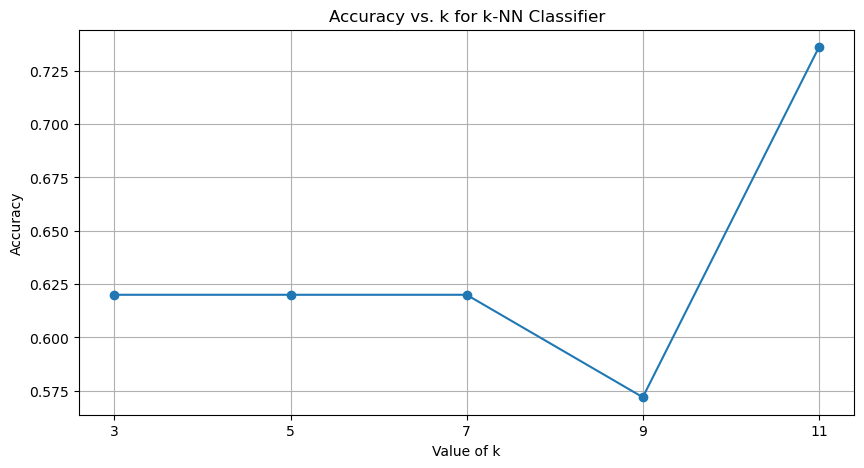

Optimal value of k for year 1: 11


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Values of k to test
k_values = [3, 5, 7, 9, 11]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train on year 1
    y_pred = knn.predict(X_test)  # Predict on year 2
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k for k-NN Classifier')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Optimal value of k
optimal_k_domain = k_values[np.argmax(accuracies)]
print("Optimal value of k for year 1:", optimal_k_domain)


##### **Solution - 2**

In [28]:
# Train with optimal k from year 1
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_domain, metric='euclidean')
knn_optimal.fit(X_train, y_train)

# Predict labels for year 2
y_pred_test = knn_optimal.predict(X_test)

# Compute accuracy for year 2
accuracy_domain = accuracy_score(y_test, y_pred_test)
print("Accuracy for Year 2 with k =", optimal_k_domain, ":", accuracy_domain)

Accuracy for Year 2 with k = 11 : 0.736


##### **Solution - 3**

In [29]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_year2).ravel()
print("Confusion Matrix for Year 2:")
print("TN:", tn, "FP:", fp)
print("FN:", fn, "TP:", tp)


Confusion Matrix for Year 2:
TN: 40 FP: 46
FN: 40 TP: 124


##### **Solution - 4**

In [30]:
# Print the results
print(f"Optimal k for Domain Transformation: {optimal_k_domain}, Accuracy: {accuracy_domain}")
print(f"Optimal k for Euclidean distance: {optimal_k_euclidean}, Accuracy: {max(euclidean_accuracies):.4f}")


Optimal k for Domain Transformation: 11, Accuracy: 0.736
Optimal k for Euclidean distance: 3, Accuracy: 0.7520


##### **Solution - 5**

In [31]:
true_positive_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
true_negative_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

print("True Positive Rate for Year 2:", true_positive_rate)
print("True Negative Rate for Year 2:", true_negative_rate)


True Positive Rate for Year 2: 0.7560975609756098
True Negative Rate for Year 2: 0.46511627906976744


##### **Solution - 6**

In [32]:
def trading_strategy(predictions, prices):
    investment = 1000
    cash = investment
    shares = 0

    for i in range(len(predictions)):
        if predictions[i] == 1:  # Green
            shares += cash / prices[i]
            cash = 0
        else:  # Red
            cash += shares * prices[i]
            shares = 0

    final_amount = cash + shares * prices.iloc[-1]  # Final amount
    return final_amount

# Example prices for year 2 (use the actual 'Adj Close' from your test set)
final_amount_domain = trading_strategy(y_pred_year2, test_data['Adj Close'])

# Define investment here, before it is used in the calculation
investment = 1000
final_amount_buy_and_hold = investment * (test_data['Adj Close'].iloc[-1] / test_data['Adj Close'].iloc[0])

print("Final amount with trading strategy for year 2:", final_amount_domain)
print("Final amount with buy-and-hold strategy:", final_amount_buy_and_hold)

Final amount with trading strategy for year 2: 318.5270802777414
Final amount with buy-and-hold strategy: 352.41270051314217


##### **Solution - 7**

In [33]:
# Compare performance
if accuracy_domain > accuracy_euclidean:
    print(f'Domain Transformation is better with accuracy: {accuracy_domain:.4f}')
else:
    print(f'Euclidean distance (p=2) is better with accuracy: {accuracy_euclidean:.4f}')

# Compare trading strategy results
if final_amount_domain > final_amount_buy_and_hold:
    print(f"Trading strategy based on k-NN labels outperforms buy-and-hold.")
else:
    print(f"Buy-and-hold strategy outperforms k-NN trading strategy.")


Euclidean distance (p=2) is better with accuracy: 0.7610
Buy-and-hold strategy outperforms k-NN trading strategy.


### **Part - 5 k-Predicted Neighbors**



##### **Solution - 1**

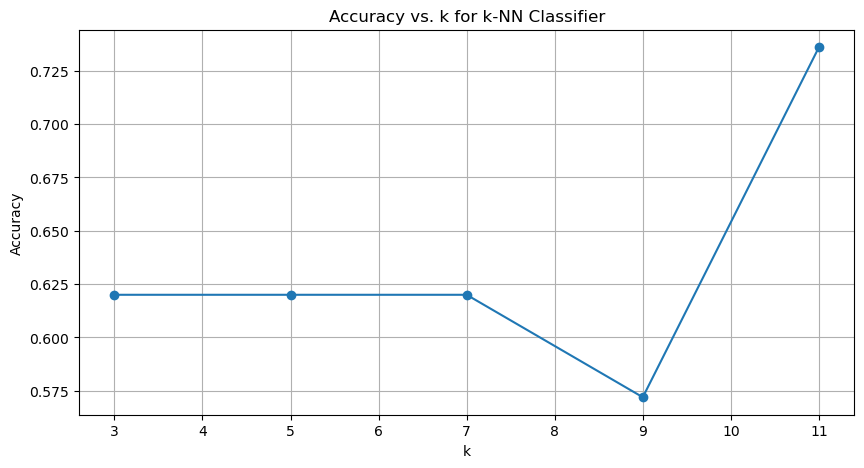

Optimal value of k for year 1: 11


In [34]:
# Define k values
k_values = [3, 5, 7, 9, 11]
accuracies = []

# Train and compute accuracy for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train on year 1 data
    y_pred = knn.predict(X_test)  # Predict on year 2 data
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting k vs accuracy
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k for k-NN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Optimal k value
optimal_k_neighbors = k_values[np.argmax(accuracies)]
print(f"Optimal value of k for year 1: {optimal_k_neighbors}")


##### **Solution - 2**

In [35]:
# Train with the optimal k from year 1
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_neighbors)
knn_optimal.fit(X_train, y_train)  # Train on year 1

# Predict labels for year 2
y_pred_year2 = knn_optimal.predict(X_test)

# Compute accuracy for year 2
accuracy_pred_neigh = accuracy_score(y_test, y_pred_year2)
print(f"Accuracy for year 2 with optimal k: {accuracy_pred_neigh:.4f}")


Accuracy for year 2 with optimal k: 0.7360


##### **Solution - 3**

In [36]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_year2).ravel()

print("Confusion Matrix for Year 2:")
print(f"TN: {tn}, FP: {fp}")
print(f"FN: {fn}, TP: {tp}")


Confusion Matrix for Year 2:
TN: 44, FP: 42
FN: 24, TP: 140


##### **Solution - 4**

In [37]:
# Print the results
print(f"Optimal k for k-Predicted Neighbors: {optimal_k_neighbors}, Accuracy: {accuracy_pred_neigh}")
print(f"Optimal k for Euclidean distance: {optimal_k_euclidean}, Accuracy: {max(euclidean_accuracies):.4f}")


Optimal k for k-Predicted Neighbors: 11, Accuracy: 0.736
Optimal k for Euclidean distance: 3, Accuracy: 0.7520


##### **Solution - 5**

In [38]:
# Calculate true positive rate (sensitivity)
true_positive_rate = tp / (tp + fn) if (tp + fn) > 0 else 0

# Calculate true negative rate (specificity)
true_negative_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"True Positive Rate (Recall) for Year 2: {true_positive_rate:.4f}")
print(f"True Negative Rate (Specificity) for Year 2: {true_negative_rate:.4f}")


True Positive Rate (Recall) for Year 2: 0.8537
True Negative Rate (Specificity) for Year 2: 0.5116


##### **Solution - 6**

In [39]:
def trading_strategy(predictions, prices):
    investment = 1000  # Starting investment amount
    cash = investment
    shares = 0

    for i in range(len(predictions)):
        if predictions[i] == 1:  # Buy (Green)
            shares += cash / prices[i]
            cash = 0
        else:  # Sell (Red)
            cash += shares * prices[i]
            shares = 0

    # Final amount after trading
    final_amount = cash + shares * prices.iloc[-1]  # Add remaining shares' value
    return final_amount

# Simulate trading strategy based on predictions for year 2
final_amount_neighbors = trading_strategy(y_pred_year2, test_data['Adj Close'])

# Compare with buy-and-hold strategy
investment = 1000  # Starting investment
final_amount_buy_and_hold = investment * (test_data['Adj Close'].iloc[-1] / test_data['Adj Close'].iloc[0])

print(f"Final amount with trading strategy: {final_amount_neighbors:.2f}")
print(f"Final amount with buy-and-hold strategy: {final_amount_buy_and_hold:.2f}")


Final amount with trading strategy: 223.39
Final amount with buy-and-hold strategy: 352.41


##### **Solution - 7**

In [40]:
# Compare accuracies
if accuracy_domain > accuracy_euclidean:
    print(f"Domain transformation k-NN is better with accuracy: {accuracy_domain:.4f}")
else:
    print(f"Regular k-NN is better with accuracy: {accuracy_euclidean:.4f}")

# Compare trading strategy results
if final_amount_neighbors > final_amount_buy_and_hold:
    print(f"Trading strategy based on k-NN labels outperforms buy-and-hold.")
else:
    print(f"Buy-and-hold strategy outperforms k-NN trading strategy.")


Regular k-NN is better with accuracy: 0.7610
Buy-and-hold strategy outperforms k-NN trading strategy.


### **Part - 6  k-Hyperplanes**



##### **Solution - 1*

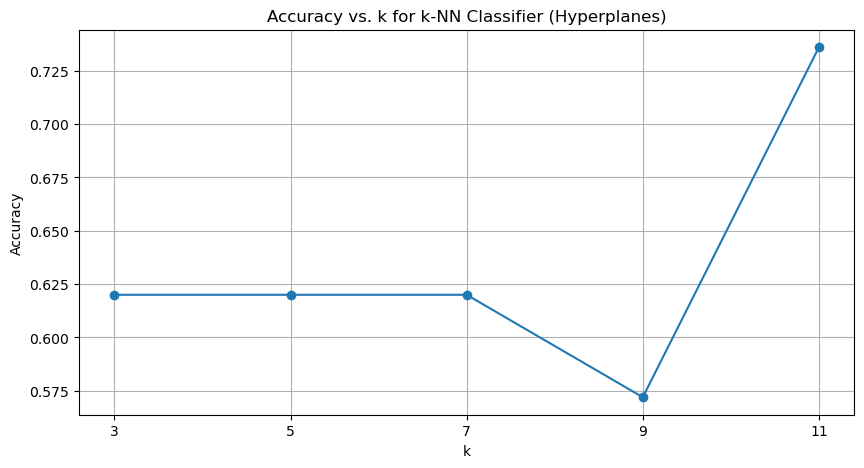

Optimal value of k for year 1 (Hyperplanes): 11


In [41]:
# Define k values
k_values = [3, 5, 7, 9, 11]
accuracies = []

# Train and compute accuracy for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train on year 1 data
    y_pred = knn.predict(X_test)  # Predict on year 2 data
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting k vs accuracy
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k for k-NN Classifier (Hyperplanes)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Optimal k value
optimal_k_hyperplanes = k_values[np.argmax(accuracies)]
print(f"Optimal value of k for year 1 (Hyperplanes): {optimal_k_hyperplanes}")


##### **Solution - 2**

In [42]:
from sklearn.metrics import confusion_matrix

# Train with the optimal k from year 1
knn_optimal_hyperplanes = KNeighborsClassifier(n_neighbors=optimal_k_hyperplanes)
knn_optimal_hyperplanes.fit(X_train, y_train)  # Train on year 1

# Predict labels for year 2
y_pred_year2_hyperplanes = knn_optimal_hyperplanes.predict(X_test)

# accuracy
accuracy_hyperplanes = accuracy_score(y_test, y_pred_year2_hyperplanes)
print(f"Accuracy for year 2 with optimal k (Hyperplanes): {accuracy_hyperplanes:.4f}")

# Compute confusion matrix for year 2
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_year2_hyperplanes).ravel()

# Calculate true positive rate (sensitivity)
true_positive_rate_hyperplanes = tp / (tp + fn) if (tp + fn) > 0 else 0

# Calculate true negative rate (specificity)
true_negative_rate_hyperplanes = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"True Positive Rate (Recall) for Year 2 (Hyperplanes): {true_positive_rate_hyperplanes:.4f}")
print(f"True Negative Rate (Specificity) for Year 2 (Hyperplanes): {true_negative_rate_hyperplanes:.4f}")


Accuracy for year 2 with optimal k (Hyperplanes): 0.7360
True Positive Rate (Recall) for Year 2 (Hyperplanes): 0.8537
True Negative Rate (Specificity) for Year 2 (Hyperplanes): 0.5116


##### **Solution - 3**

In [43]:
def trading_strategy(predictions, prices):
    investment = 1000  # Starting investment amount
    cash = investment
    shares = 0

    for i in range(len(predictions)):
        if predictions[i] == 1:  # Buy (Green)
            shares += cash / prices[i]
            cash = 0
        else:  # Sell (Red)
            cash += shares * prices[i]
            shares = 0

    # Final amount after trading
    final_amount = cash + shares * prices.iloc[-1]  # Add remaining shares' value
    return final_amount

# Simulate trading strategy based on predictions for year 2
final_amount_hyperplanes = trading_strategy(y_pred_year2_hyperplanes, test_data['Adj Close'])

# Compare with buy-and-hold strategy
investment = 1000  # Starting investment
final_amount_buy_and_hold = investment * (test_data['Adj Close'].iloc[-1] / test_data['Adj Close'].iloc[0])

print(f"Final amount with trading strategy (Hyperplanes): {final_amount_hyperplanes:.2f}")
print(f"Final amount with buy-and-hold strategy (Hyperplanes): {final_amount_buy_and_hold:.2f}")


Final amount with trading strategy (Hyperplanes): 223.39
Final amount with buy-and-hold strategy (Hyperplanes): 352.41


##### **Solution - 4**

In [44]:
# Compare accuracies
if accuracy_hyperplanes > accuracy_euclidean:
    print(f"Domain transformation k-NN is better with accuracy: {accuracy_hyperplanes:.4f}")
else:
    print(f"Regular k-NN is better with accuracy: {accuracy_euclidean:.4f}")

# Compare trading strategy results
if final_amount_hyperplanes > final_amount_buy_and_hold:
    print("Trading strategy based on k-Hyperplanes labels outperforms buy-and-hold.")
else:
    print("Buy-and-hold strategy outperforms k-Hyperplanes trading strategy.")


Regular k-NN is better with accuracy: 0.7610
Buy-and-hold strategy outperforms k-Hyperplanes trading strategy.


### **Part - 7 Table**



In [48]:
import pandas as pd
import matplotlib.pyplot as plt
results = {
    "Method": [
        "Buy-and-Hold",
        "k-NN (Euclidean, p=2)",
        "k-NN (Manhattan, p=1)",
        "k-NN (Minkowski, p=1.5)",
        "Nearest Centroid",
        "Domain Transformation",
        "k-Predicted Neighbors",
        "k-Hyperplanes"
    ],
    "Best k": [
        "N/A",
        optimal_k_euclidean,
        optimal_k_manhattan,
        optimal_k_minkowski,
        "N/A",
        optimal_k_domain,
        optimal_k_neighbors,
        optimal_k_hyperplanes
    ],
    "% Accuracy": [
        None,
        round(accuracy_euclidean * 100),
        round(accuracy_manhattan * 100),
        round(accuracy_minkowski * 100),
        None,
        round(accuracy_domain * 100),
        round(accuracy_pred_neigh * 100),
        round(accuracy_hyperplanes * 100)
    ],
    "Amount": [
        round(final_amount_buy_and_hold),
        round(final_amount_euclidean),
        round(final_amount_manhattan),
        round(final_amount_minkowski),
        round(final_amount_centroid),
        round(final_amount_domain),
        round(final_amount_neighbors),
        round(final_amount_hyperplanes)
    ]
}

# Create a DataFrame
df_results = pd.DataFrame(results)

# Function to highlight extremes
def highlight_extremes(s):
    color = []
    for val in s:
        if pd.isna(val):
            color.append('')
        elif val == s.max():
            color.append('background-color: green')
        elif val == s.min():
            color.append('background-color: red')
        else:
            color.append('')
    return color

# Apply the highlight function to Accuracy and Amount columns
styled_df = df_results.style.apply(highlight_extremes, subset=['% Accuracy', 'Amount'])

# Display the styled DataFrame directly
styled_df

,Method,Best k,% Accuracy,Amount
0,Buy-and-Hold,N/A,nan,352
1,"k-NN (Euclidean, p=2)",3,76.000000,240
2,"k-NN (Manhattan, p=1)",11,75.000000,488
3,"k-NN (Minkowski, p=1.5)",3,66.000000,335
4,Nearest Centroid,N/A,nan,46936
5,Domain Transformation,11,74.000000,319
6,k-Predicted Neighbors,11,74.000000,223
7,k-Hyperplanes,11,74.000000,223
